In [43]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = wrangle("train.csv")

In [45]:
# Creating a data wrangle function.
def wrangle(filepath):
    # importing the dataset.
    df = pd.read_csv(filepath)
    
    #Can see all the columns with this code.
    #pd.pandas.set_option('display.max_rows', None)
    
    # Below code gives percentage of null in every column
    null_percentage = df.isnull().sum()/df.shape[0]*100
    # Below code gives list of columns having more than 60% null
    col_to_drop = null_percentage[null_percentage>60].keys()
    df.drop(col_to_drop, axis=1,inplace=True)
    
    #Removing all the columns which are less than three.
    df.drop(columns=["Street"],inplace = True)
    #Removing columns with high cardinality.
    df.drop(columns=["Neighborhood","Exterior2nd","Utilities","CentralAir"],inplace=True)
    
    return df

In [46]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [51]:
df.shape

(1460, 72)

In [52]:
#Statement to check high and low cardinality.
df.select_dtypes("object").nunique()

MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [53]:
df1 = pd.read_csv("PremierProject.csv")

In [55]:
df1 = df1.drop(columns='Id')
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Feedr,Norm,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,Norm,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Norm,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,Norm,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [56]:
df1.shape

(1460, 71)

In [17]:
#Explore the data.

In [57]:
#To check the information of specific column.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [58]:
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
df1.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


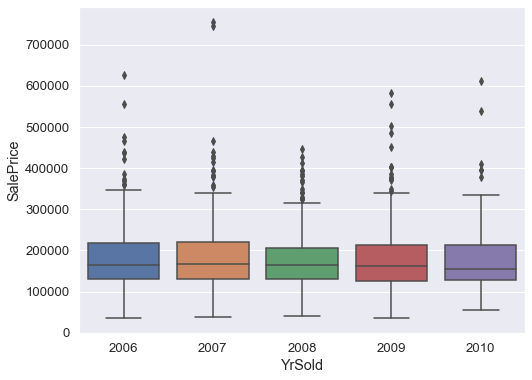

In [96]:
var = 'YrSold'
data_plot = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data_plot)

In [97]:
#split the data into training and test set.
feature = ["YrSold"]
X = df1[feature]
target = ["SalePrice"]
y = df1[target]

In [98]:
X

,YrSold
0,2008
1,2007
2,2008
3,2006
4,2008
...,...
1455,2007
1456,2010
1457,2010
1458,2010


In [99]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [100]:
#splitting the dataset to trainingset and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [64]:
#Build Model

In [65]:
#Baseline.

In [101]:
y_mean = y_train.mean()
y_mean

SalePrice    181438.534247
dtype: float64

In [67]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline

[SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice    181438.534247
 dtype: float64,
 SalePrice

In [102]:
#Calculating baseline MAE Mean Absolute Error.
from sklearn.metrics import mean_absolute_error
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(baseline_mae,2))

Mean apt price: SalePrice    181438.53
dtype: float64
Baseline MAE: 56108.37


In [23]:
#Importing Linear regression ML.

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred = lin_reg.predict(X_test)

In [106]:
len(y_pred)

438

In [107]:
# Calculating Residual sum of square.
rss = np.sum(np.square(y_test - y_pred))
round(rss,2)

SalePrice    3.130113e+12
dtype: float64

In [108]:
# Root mean squared error.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
round(rmse,2)

84536.25

In [109]:
#calcuating the mae of Machine learning model.

In [110]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y_test,y_pred)
print("Mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(mae1,2))

Mean apt price: SalePrice    181438.53
dtype: float64
Baseline MAE: 60951.62


In [111]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[0][idx]))

The coefficient for YrSold is 143.08940576748432


In [112]:
intercept = lin_reg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -105862.17103439607


In [113]:
#Rsquared

lin_reg.score(X_train, y_train)

6.051910972582064e-06

In [114]:
#out of sample score (R^2)

lin_reg.score(X_test, y_test)

-0.0008507833872273274

Text(0.5, 1.0, 'Relationship between Sales Price and Overrall Quality')

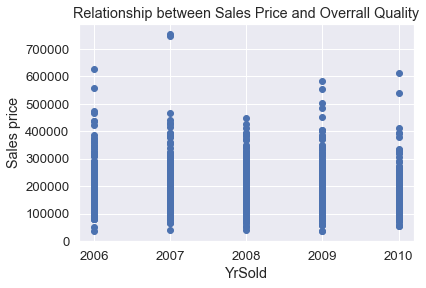

In [115]:
plt.scatter(X,y)
plt.xlabel('YrSold')
plt.ylabel('Sales price')
plt.title('Relationship between Sales Price and Overrall Quality')

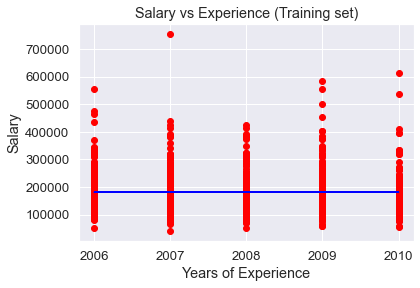

In [118]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

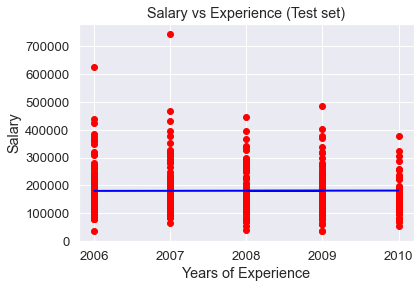

In [119]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()